# LAB01 - Correlation

## Ex 1: Frequency estimation of a sine wave

### Needed librairies
- numpy
- matplotlib

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# specific for matplotlib to avoid a warning message regarding font
from matplotlib import rcParams
rcParams["font.family"] = "Verdana";


### Parameters

| Name 	| Description 	| Unit 	|
|------|-------------	|:----:	|
| Fs| sampling rate |[Hz]|
| f| signal frequency |[Hz]|
| N| number of samples in f|N/A|
| A| signal amplitude|N/A|


In [3]:
Fs=1000.0;
f=10.0;
N=1000;
A=1;

### Step 1: generate $x_k$

$x_k = sin(2πft)$ avec $t=\frac{k}{N}$

In [4]:
# construct t and x
t=np.linspace(0.0, N/Fs, num=N);
x=np.zeros(N);
x=A*np.sin(2*np.pi*f*t);
print('t=[',t[0],'...',t[-1],']')
print('num samples=',len(x));


t=[ 0.0 ... 1.0 ]
num samples= 1000


### Step 2: Display $x_k$ versus time


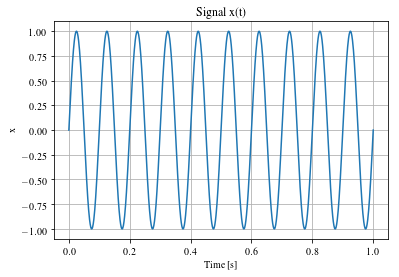

In [5]:
# diplay x
plt.figure();
plt.plot(t,x);
plt.grid(axis='both', which='major', b=True);
plt.xlabel('Time [s]');
plt.ylabel('x');
plt.title('Signal x(t)');
plt.show();

### Function to compute the biased autocorrelation

## $\hat{r}_{xx}[k]=\frac{1}{N}\sum_{n=0}^{N-1}x[n]\, x[n+k],\qquad k_{min}\le k\le k_{max}$

#### Prototype:
- biasedAutoCorrelation(x, kMin, kMax)

#### Inputs:
- x is the signal to compute the biased autocorrelation
- kmin is the start index for computation
- kmax is the stop index for computation

#### Outputs:
- lags: a table with lags from 0 to N-1 (N is the number of sample of x)
- rxx: the biased autocorrelation table


In [16]:
def biasedAutoCorrelation(x, kMin, kMax):

    N=len(x);
    if N==0:
        raise Exception('[biasedAutoCorrelation] error, x is empty.')
    if kMin<0 or kMin>N:
        raise Exception('[biasedAutoCorrelation] error, kMin not in valid range.')
    if kMax<0 or kMax>N or kMax<=kMin:
        raise Exception('[biasedAutoCorrelation] error, kMax not in valid range.')

    rxx=np.zeros(N);
    lags=range(0,N);
    for k in range(kMin,kMax):
        sum=0;
        for n in range(0,N):
            if(n+k<N):
                sum=sum+x[n]*x[n+k];
        rxx[k]=sum/N;
        
    return lags,rxx;

### Function to compute the unbiased autocorrelation

## $\hat{r}_{xx}[k]=\frac{1}{N-|k|}\sum_{n=0}^{N-1}x[n]\, x[n+k],\qquad k_{min}\le k\le k_{max}$

#### Function prototype:
- unbiasedAutoCorrelation(x, kMin, kMax)

#### Inputs:
- x is the signal to compute the unbiased autocorrelation
- kmin is the start index for computation
- kmax is the stop index for computation

#### Outputs:
- lags: a table with lags from 0 to N-1 (N is the number of sample of x)
- rxx: the imbiased autocorrelation table


In [17]:
def unbiasedAutoCorrelation(x, kMin, kMax):

    N=len(x);
    if N==0:
        raise Exception('[unbiasedAutoCorrelation] error, x is empty')
    if kMin<0 or kMin>N:
        raise Exception('[unbiasedAutoCorrelation] error, kMin not in valid range.')
    if kMax<0 or kMax>N or kMax<=kMin:
        raise Exception('[unbiasedAutoCorrelation] error, kMax not in valid range.')

    rxx=np.zeros(N);
    lags=range(0,N);
    for k in range(kMin,kMax):
        sum=0;
        for n in range(0,N):
            if(n+k<N):
                sum=sum+x[n]*x[n+k];
        rxx[k]=sum/(N-k);
        
    return lags,rxx;

### Step 3: compute biased autocorrelation

In [18]:
lags,biasedRxx=biasedAutoCorrelation(x,0,N);

### Step 4: display biased autocorrelation

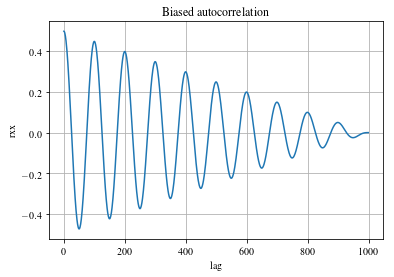

In [19]:
plt.figure();
plt.plot(lags,biasedRxx);
plt.grid(axis='both', which='major', b=True);
plt.xlabel('lag')
plt.ylabel('rxx')
plt.title('Biased autocorrelation')
plt.show();

### Step 5: compute unbiased auto correlation

In [20]:
lags,unbiasedRxx=unbiasedAutoCorrelation(x,0,N);

### Step 6: display unbiased autocorrelation

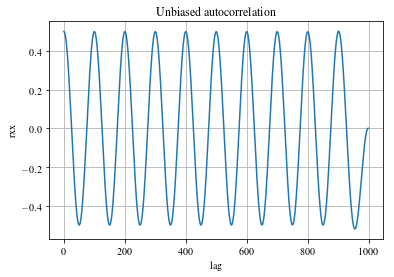

In [21]:
plt.figure();
plt.plot(lags,unbiasedRxx);
plt.grid(axis='both', which='major', b=True);
plt.xlabel('lag')
plt.ylabel('rxx')
plt.title('Unbiased autocorrelation')
plt.show();

### Function to find the first peak in a signal

This function searches for the first peak in the $x$ array with window $w$. The peak is defined as followed:

$ x_{k-w} < x_k < x_{k+w}$

#### Function prototype:
- findFirstPeak(x, w)

#### Inputs:
- x is the signal where to search the first peak
- w (optional parameter) is the half window width of search area ; default value = 1

#### Outputs:
- lag of the first peak (-1 if not found)


In [22]:
def findFirstPeak(x,w=1):
    
    N=len(x);
    if N==0:
        raise Exception('[findFirstPeak] error, x is empty')

    peakFound=False;
    finished=False;
    lagMax=-1;
    
    k=w;
    while(not finished):
        if k+w<N and x[k-w]<x[k] and x[k]>x[k+w]:
            peakFound=True;
            lagMax=k;
            finished=True;
        k=k+1;
        if k+w>=N:
            finished=True;

    return lagMax;

In [23]:
#x=[0,1,0,3,4,5,6];
#lagMax=findFirstPeak(x,2);
#print('lagMax=',lagMax);


### Step 7: compute signal frequency (finding first peak in rxx)

In [24]:
lagMax=findFirstPeak(biasedRxx);
print('lagMax=',lagMax);
sineFreq=Fs/lagMax;
print('Estimate frequency=%(sineFreq)+6.1f Hz' %{'sineFreq':sineFreq})

lagMax= 100
Estimate frequency= +10.0 Hz


### Step 8: display result

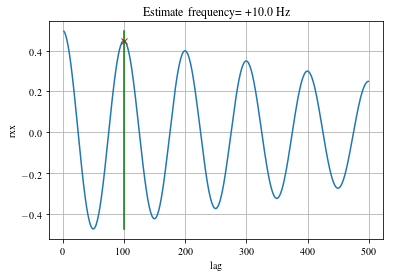

In [25]:
plt.figure();
displayLagMin=2;
displayLagMax=N//2;
plt.plot(lags[displayLagMin:displayLagMax],biasedRxx[displayLagMin:displayLagMax]);
plt.plot(lags[lagMax],biasedRxx[lagMax],'rx');
linex=[lagMax,lagMax]
liney=[min(biasedRxx[displayLagMin:displayLagMax]),max(biasedRxx[displayLagMin:displayLagMax])];
plt.plot(linex,liney,'g')
plt.grid(axis='both', which='major', b=True);
plt.xlabel('lag')
plt.ylabel('rxx')
plt.title('Biased autocorrelation')
plt.xlabel('lag')
plt.ylabel('rxx')
plt.title('Estimate frequency=%(sineFreq)+6.1f Hz' %{'sineFreq':sineFreq})
plt.show();